https://www.jiqizhixin.com/articles/2018-02-14-6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
white_wine = pd.read_csv('../../dataset/winequality-white.csv', sep=';')
red_wine = pd.read_csv('../../dataset/winequality-red.csv', sep=';')

In [3]:
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

In [5]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')

In [6]:
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high'])

In [8]:
wines = pd.concat([red_wine, white_wine])

In [9]:
wines = wines.sample(frac=1,random_state=42).reset_index(drop=True)

In [10]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,NaN
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,NaN
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,NaN
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,NaN


In [11]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 
                     'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

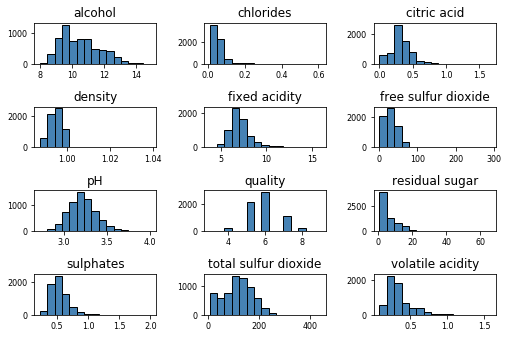

In [33]:
# 可视化一维数据
wines.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2,1.2)) 

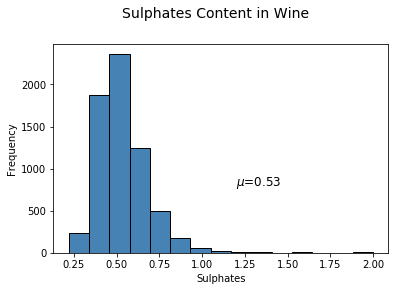

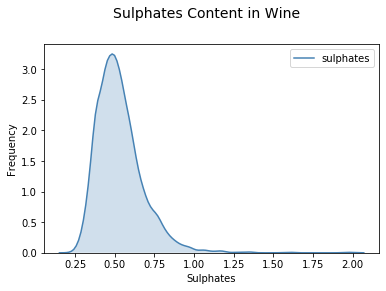

In [37]:
fig = plt.figure(figsize=(6,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2)), fontsize=12)
freq, bins, patches = ax.hist(wines['sulphates'], color='steelblue', bins=15,edgecolor='black', linewidth=1)

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')